### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.macosx-10.9-x86_64-3.8/agent_timestep.cpython-38-darwin.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import matplotlib.pyplot as plt

2021-10-06 16:21:39,283	INFO worker.py:726 -- Connecting to existing Ray cluster at address: 10.162.14.77:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

5067210
[15  2 34 10 24 47  8 27 28 46]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 2, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 4, # 3 instead? how much stimulus the LIP gets at maximum
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl],[environment])

(pid=3831) 10 6 1.0`
(pid=3831) 10 8 1.0`
(pid=3831) 11 7 1.0`
(pid=3831) 11 9 1.0`
(pid=3831) 10 6 1.0`
(pid=3831) 10 8 1.0`
(pid=3831) 11 7 1.0`
(pid=3831) 11 9 1.0`
(pid=3831) 10 6 1.0`
(pid=3831) 10 8 1.0`
(pid=3831) 11 7 1.0`
(pid=3831) 11 9 1.0`
(pid=3831) 10 6 1.0`
(pid=3831) 10 8 1.0`
(pid=3831) 11 7 1.0`
(pid=3831) 11 9 1.0`
(pid=3831) 10 6 1.0`
(pid=3831) 10 8 1.0`
(pid=3831) 11 7 1.0`
(pid=3831) 11 9 1.0`
(pid=3831) 10 6 1.0`
(pid=3831) 10 8 1.0`
(pid=3831) 11 7 1.0`
(pid=3831) 11 9 1.0`
(pid=3831) 12 10 0.8334`
(pid=3831) 12 10 0.8334`
(pid=3831) 12 11 0.8334`
(pid=3831) 12 10 0.8334`
(pid=3831) 12 11 0.8334`
(pid=3831) 12 11 0.8334`
(pid=3831) 13 10 0.8334`
(pid=3831) 13 10 0.8334`
(pid=3831) 13 10 0.8334`
(pid=3831) 13 11 0.8334`
(pid=3831) 13 11 0.8334`
(pid=3831) 13 11 0.8334`
(pid=3831) agent.extstim [4. 4.]
(pid=3831) agent.gain [1. 1.]
(pid=3831) agent.ramping_extstim [0.4 0.4]
(pid=3831) agent.extstim [4. 4.]
(pid=3831) agent.gain [1. 1.]
(pid=3831) agent.ramping_ex

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.51821475 0.07412081]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.56639328 0.06670873]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.60975395 0.06003785]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.64877855 0.05403407]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.6839007  0.04863066]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.51821475 0.07412081]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.56639328 0.06670873]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.60975395 0.06003785]
(pid=383

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.93491796 0.01001262]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.94142616 0.00901136]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.94728355 0.00811022]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.95255519 0.0072992 ]
(pid=3831) agent.extstim 
(pid=3831) [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.95729967 0.00656928]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.94142616 0.00901136]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.94728355 0.00811022]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.95255519 0.007299

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99023153e+00 1.50284085e-03]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99120838e+00 1.35255677e-03]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99208754e+00 1.21730109e-03]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99287879e+00 1.09557098e-03]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99359091e+00 9.86013882e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99120838e+00 1.35255677e-03]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99208754e+00 1.21730109e-03]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99853381e+00 2.25568349e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99868043e+00 2.03011514e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99881238e+00 1.82710363e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99853381e+00 2.25568349e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99868043e+00 2.03011514e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99881238e+00 1.82710363e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99893114e+00 1.64439327e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99972831e+00 4.17982705e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99975548e+00 3.76184435e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99977993e+00 3.38565991e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99980194e+00 3.04709392e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99977993e+00 3.38565991e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99980194e+00 3.04709392e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99982175e+00 2.74238453e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.42994966e+00 7.74530392e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.18695469e+00 6.97077352e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.96825922e+00 6.27369617e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.77143330e+00 5.64632655e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.59428997e+00 5.08169390e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.96825922e+00 6.27369617e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.77143330e+00 5.64632655e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.59428

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.95425150e-01 9.41648139e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.65882635e-01 8.47483325e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.39294371e-01 7.62734992e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.15364934e-01 6.86461493e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.93828441e-01 6.17815344e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.15364934e-01 6.86461493e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.93828441e-01 6.17815344e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.74445

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.59168014e-02 1.14482431e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.23251213e-02 1.03034187e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.90926091e-02 9.27307687e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.61833482e-02 8.34576919e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.90926091e-02 9.27307687e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.61833482e-02 8.34576919e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.35650134e-02 7.51119227e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.12085

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [5.98991023e-03 1.90924430e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [5.39091921e-03 1.71831987e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.85182729e-03 1.54648788e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.36664456e-03 1.39183909e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.85182729e-03 1.54648788e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.36664456e-03 1.39183909e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.92998010e-03 1.25265518e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.53698

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [9.98948213e-04 3.18408140e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [8.99053392e-04 2.86567326e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [8.09148053e-04 2.57910594e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [7.28233247e-04 2.32119534e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [6.55409923e-04 2.08907581e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [7.28233247e-04 2.32119534e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [6.55409923e-04 2.08907581e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [5.89868

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.21448782e-04 3.87109965e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.09303904e-04 3.48398968e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [9.83735133e-05 3.13559071e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [8.85361620e-05 2.82203164e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [7.96825458e-05 2.53982848e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [8.85361620e-05 2.82203164e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [7.96825458e-05 2.53982848e-10]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [7.17142

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.26570143 0.11297181]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.33913129 0.10167463]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.40521816 0.09150717]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.46469635 0.08235645]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.33913129 0.10167463]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.40521816 0.09150717]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.46469635 0.08235645]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.51822671 0.07412081]
(pid=383

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.87753969 0.01884051]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.88978572 0.01695646]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.90080715 0.01526082]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.91072644 0.01373474]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.88978572 0.01695646]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.90080715 0.01526082]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.91072644 0.01373474]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.91965379 0.01236126]
(pid=383

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99693463e+00 4.71607383e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99724117e+00 4.24446645e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99751705e+00 3.82001981e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99776534e+00 3.43801782e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99798881e+00 3.09421604e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99693463e+00 4.71607383e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99724117e+00 4.24446645e-04]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831

(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99958591e+00 6.37071644e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99962732e+00 5.73364479e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99966459e+00 5.16028032e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99969813e+00 4.64425228e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99972832e+00 4.17982706e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99962732e+00 5.73364479e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831) agent.ramping_extstim [2.99966459e+00 5.16028032e-05]
(pid=3831) agent.extstim [3. 0.]
(pid=3831) agent.gain [0.75 0.  ]
(pid=3831

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.69994406e+00 8.60589324e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.42994966e+00 7.74530392e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.18695469e+00 6.97077353e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.96825922e+00 6.27369617e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [1.77143330e+00 5.64632656e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.69994406e+00 8.60589324e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.42994966e+00 7.74530392e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.18695

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.28250167e-01 1.04627571e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.95425150e-01 9.41648139e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.65882635e-01 8.47483325e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.39294372e-01 7.62734993e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.15364934e-01 6.86461494e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.28250167e-01 1.04627571e-06]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.95425150e-01 9.41648139e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.65882

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.59168014e-02 1.14482431e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.23251213e-02 1.03034188e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.90926092e-02 9.27307688e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.61833482e-02 8.34576919e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.35650134e-02 7.51119227e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.59168014e-02 1.14482431e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.23251213e-02 1.03034188e-07]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.90926

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.36664456e-03 1.39183909e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.92998011e-03 1.25265518e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.53698209e-03 1.12738966e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.18328389e-03 1.01465070e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [2.86495550e-03 9.13185628e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.36664456e-03 1.39183909e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.92998011e-03 1.25265518e-08]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.53698

(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [5.30882038e-04 1.69215141e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.77793834e-04 1.52293626e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.30014450e-04 1.37064264e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.87013005e-04 1.23357837e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [3.48311705e-04 1.11022054e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [5.30882038e-04 1.69215141e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.77793834e-04 1.52293626e-09]
(pid=3831) agent.extstim [0. 0.]
(pid=3831) agent.gain [0. 0.]
(pid=3831) agent.ramping_extstim [4.30014

In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [11]:
results[0]['connectivity_AMPA']

,GPi,GPi,STNE,STNE,GPeP,GPeP,D1STR,D1STR,D2STR,D2STR,LIP,LIP,Th,Th,FSI,LIPI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [12]:
cbgt.saveResults(results,'test',['popfreqs','popdata'])

In [13]:
results[0]['actionchannels']

,action
0,left
1,right


In [14]:
results[0]['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_APRE,dpmn_APOST,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_a,dpmn_b,dpmn_c,column
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3
4,GPeP`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4
5,GPeP`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5
6,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,6
7,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,7
8,D2STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,8
9,D2STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,9


In [15]:
results[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0
1,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1
2,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,2
3,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,402
403,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,403
404,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,404
405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,405


In [16]:
results[0] = plt_func.rename_columns(results[0])
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0
1,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1
2,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,2
3,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,402
403,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,403
404,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,404
405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,405


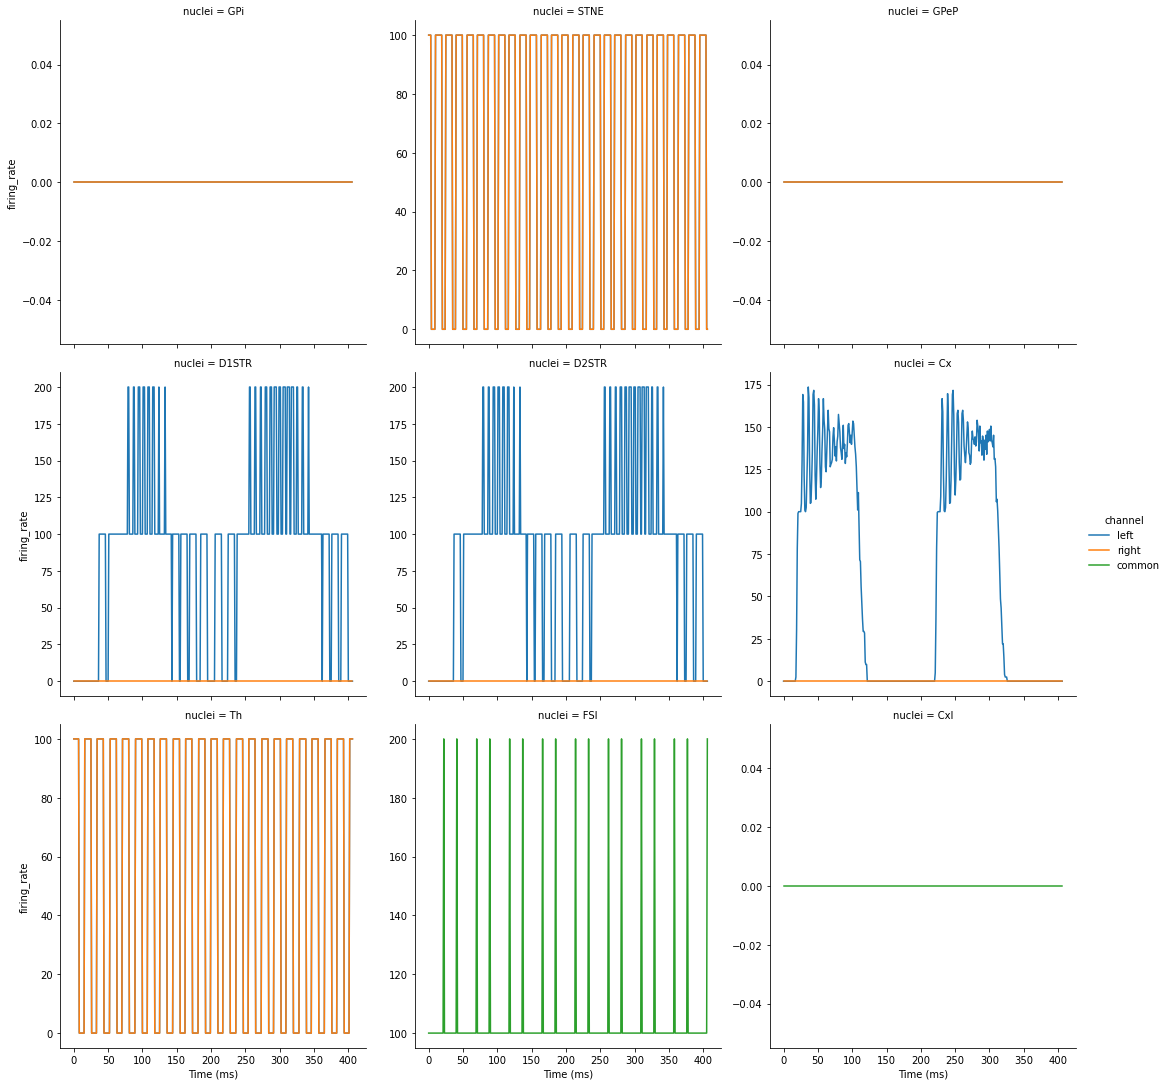

In [17]:
plt_func.plot_fr(results[0])

In [ ]:
savedresults = cbgt.loadResults('test')
savedresults[0]['popfreqs']

In [ ]:
t_epochs = cbgt.collateVariable(results,'t_epochs')
t_epochs

In [ ]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [ ]:
Q_df = cbgt.collateVariable(results,'Q_df')
Q_df[0]

In [ ]:
datatables = cbgt.collateVariable(results,'datatables')

In [ ]:
datatables[0]

In [ ]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [ ]:
popdata = cbgt.collateVariable(results,'popdata')

In [ ]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

In [ ]:
plt.plot(popfreqs[0].iloc[:,10])
plt.plot(popfreqs[0].iloc[:,11])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 